In [49]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score,confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from pandas import DataFrame
from sklearn.svm import SVC
import plotly.express as px
from sklearn.metrics import confusion_matrix,classification_report

In [14]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [15]:
tumor_data = pd.read_csv('/content/gdrive/MyDrive/data.csv',header=0)
tumor_data.head(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [16]:
tumor_data.drop(['id','Unnamed: 32'],axis=1,inplace=True)
tumor_data

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [17]:
tumor_data.shape

(569, 31)

In [18]:
tumor_data['diagnosis'].unique()

array(['M', 'B'], dtype=object)

In [19]:
tumor_data['diagnosis'] = tumor_data['diagnosis'].map({'M':1,'B':0})

In [20]:
tumor_data.describe()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [21]:
tumor_data.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

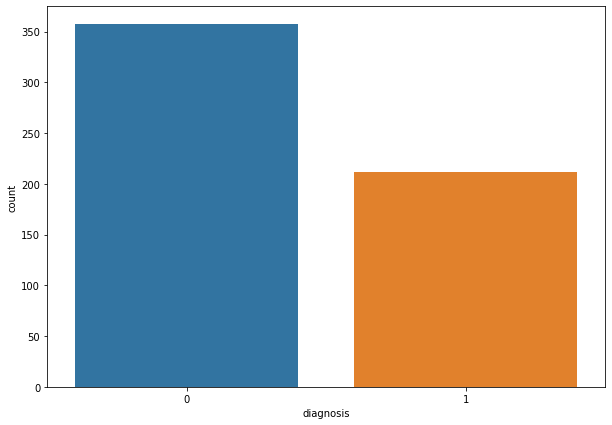

In [22]:
plt.figure(figsize=(10,7))
sns.countplot(x='diagnosis',data=tumor_data)
plt.show()

In [23]:
fig = px.scatter_matrix(tumor_data,dimensions=tumor_data.columns[1:6],color="diagnosis")

fig.update_layout(
    title='Breast Cancer ANALYSIS',
    dragmode='select',
    width=1000,
    height=1000
)
fig.show()

In [24]:
fig = px.scatter_matrix(tumor_data,dimensions=tumor_data.columns[6:11],color="diagnosis")

fig.update_layout(
    title='Breast Cancer ANALYSIS',
    dragmode='select',
    width=1000,
    height=1000
)
fig.show()

In [25]:
fig = px.scatter_matrix(tumor_data,dimensions=tumor_data.columns[11:16],color="diagnosis")

fig.update_layout(
    title='Breast Cancer ANALYSIS',
    dragmode='select',
    width=1000,
    height=1000
)
fig.show()

In [26]:
fig = px.scatter_matrix(tumor_data,dimensions=tumor_data.columns[16:22],color="diagnosis")

fig.update_layout(
    title='Breast Cancer ANALYSIS',
    dragmode='select',
    width=1000,
    height=1000
)
fig.show()

In [27]:
fig = px.scatter_matrix(tumor_data,dimensions=tumor_data.columns[22:28],color="diagnosis")

fig.update_layout(
    title='Breast Cancer ANALYSIS',
    dragmode='select',
    width=1000,
    height=1000
)
fig.show()

In [28]:
fig = px.scatter_matrix(tumor_data,dimensions=tumor_data.columns[28:31],color="diagnosis")

fig.update_layout(
    title='Breast Cancer ANALYSIS',
    dragmode='select',
    width=1000,
    height=700
)
fig.show()

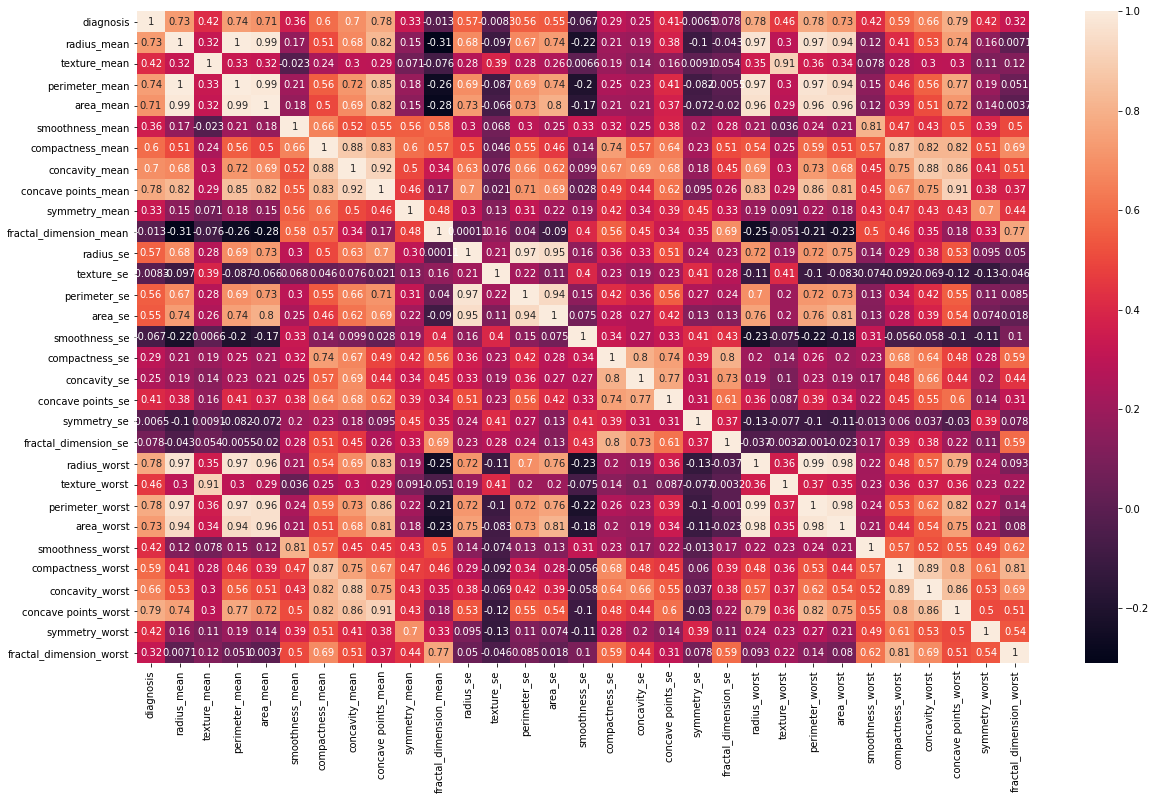

In [29]:
plt.figure(figsize=(20,12))
sns.heatmap(tumor_data.corr(),annot=True)
plt.show()

In [30]:
refined_data = tumor_data.drop(['perimeter_mean', 'area_mean', 
                            'radius_worst', 'perimeter_worst', 'area_worst',
                           'perimeter_se', 'area_se', 'texture_worst',
                           'concave points_worst', 'concavity_mean', 'compactness_worst','concave points_mean'], axis=1)
refined_data

,diagnosis,radius_mean,texture_mean,smoothness_mean,compactness_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,smoothness_worst,concavity_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,0.11840,0.27760,0.2419,0.07871,1.0950,0.9053,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,0.16220,0.7119,0.4601,0.11890
1,1,20.57,17.77,0.08474,0.07864,0.1812,0.05667,0.5435,0.7339,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,0.12380,0.2416,0.2750,0.08902
2,1,19.69,21.25,0.10960,0.15990,0.2069,0.05999,0.7456,0.7869,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,0.14440,0.4504,0.3613,0.08758
3,1,11.42,20.38,0.14250,0.28390,0.2597,0.09744,0.4956,1.1560,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,0.20980,0.6869,0.6638,0.17300
4,1,20.29,14.34,0.10030,0.13280,0.1809,0.05883,0.7572,0.7813,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,0.13740,0.4000,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,21.56,22.39,0.11100,0.11590,0.1726,0.05623,1.1760,1.2560,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,0.14100,0.4107,0.2060,0.07115
565,1,20.13,28.25,0.09780,0.10340,0.1752,0.05533,0.7655,2.4630,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,0.11660,0.3215,0.2572,0.06637
566,1,16.60,28.08,0.08455,0.10230,0.1590,0.05648,0.4564,1.0750,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,0.11390,0.3403,0.2218,0.07820
567,1,20.60,29.33,0.11780,0.27700,0.2397,0.07016,0.7260,1.5950,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,0.16500,0.9387,0.4087,0.12400


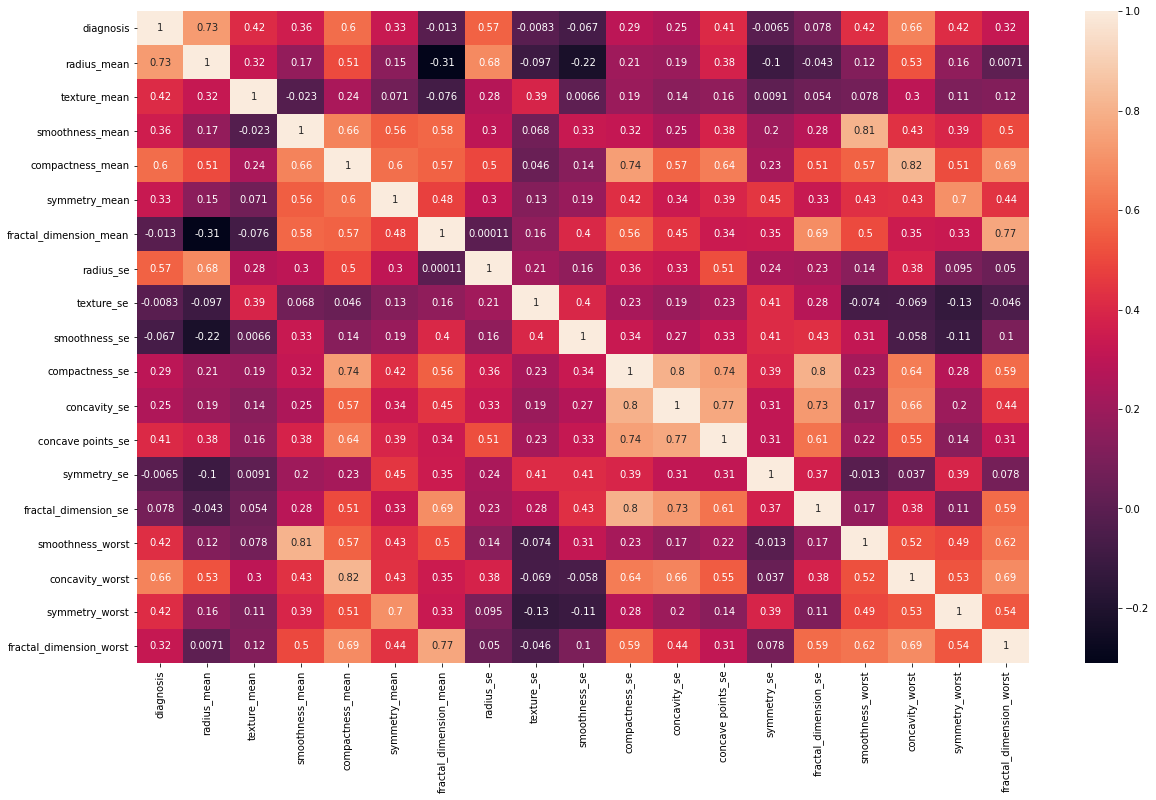

In [31]:
plt.figure(figsize=(20,12))
sns.heatmap(refined_data.corr(),annot=True)
plt.show()

In [32]:
seeds = 123

In [33]:
X = refined_data.drop(['diagnosis'],axis=1)
Y = refined_data['diagnosis'] 

In [34]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3,random_state=seeds)

In [35]:
norm = MinMaxScaler().fit(X_train)

# transform training data
X_train_norm = norm.transform(X_train)

# transform testing dataabs
X_test_norm = norm.transform(X_test)

In [36]:
X_test

,radius_mean,texture_mean,smoothness_mean,compactness_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,smoothness_worst,concavity_worst,symmetry_worst,fractal_dimension_worst
333,11.250,14.78,0.08306,0.04458,0.1773,0.06081,0.2144,0.9961,0.005617,0.007124,0.000974,0.002941,0.01700,0.002030,0.11660,0.005518,0.2815,0.07418
273,9.742,15.67,0.09037,0.04689,0.2081,0.06312,0.2684,1.4090,0.013800,0.010670,0.008347,0.009472,0.01798,0.004261,0.14670,0.040430,0.2841,0.08175
201,17.540,19.32,0.08968,0.11980,0.1506,0.05491,0.3971,0.8282,0.006090,0.025690,0.027130,0.013450,0.01594,0.002658,0.13810,0.350800,0.2928,0.07867
178,13.010,22.22,0.06251,0.01938,0.1395,0.05234,0.1731,1.1420,0.003418,0.002252,0.001595,0.001852,0.01613,0.000968,0.08125,0.007977,0.2295,0.05843
85,18.460,18.52,0.09874,0.10530,0.2132,0.06022,0.6997,1.4750,0.006471,0.016490,0.028060,0.014200,0.02370,0.003755,0.13980,0.315700,0.3695,0.08579
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101,6.981,13.43,0.11700,0.07568,0.1930,0.07818,0.2241,1.5080,0.010190,0.010840,0.000000,0.000000,0.02659,0.004100,0.15840,0.000000,0.2932,0.09382
329,16.260,21.88,0.11650,0.12830,0.1869,0.06532,0.5706,1.4570,0.010560,0.037560,0.058390,0.011860,0.04022,0.006187,0.14260,0.334400,0.2736,0.07953
42,19.070,24.81,0.09081,0.21900,0.2310,0.06343,0.9811,1.6660,0.006548,0.100600,0.097230,0.026380,0.05333,0.007646,0.12470,0.724200,0.4670,0.10380
432,20.180,19.54,0.11330,0.14890,0.1724,0.06053,0.4331,1.0010,0.009087,0.027150,0.055460,0.019100,0.02451,0.004005,0.16650,0.530800,0.3032,0.08075


In [37]:
stdscale = StandardScaler().fit(X_train)

# transform training data
X_train_std = stdscale.transform(X_train)

# transform testing dataabs
X_test_std = stdscale.transform(X_test)

**MODEL SELECTION**

In [38]:
lr = LogisticRegression(max_iter=500,n_jobs=-1,random_state=seeds)
knn = KNN()
svc = SVC(kernel='rbf',probability=True,random_state=seeds)
kd = DecisionTreeClassifier(random_state=seeds)
rfr = RandomForestClassifier(random_state=seeds)

algo_name = [('Logistic Regression',lr),('K Nearest Neighbour',knn),('SVC',svc),('Decision Tree',kd),('Random Forest',rfr)]

**PREDICTION WITHOUT NORMALIZATION OR STANDARDIZATION**

In [39]:
ans=[]
accu = []
for name,func in algo_name:
  func.fit(X_train,Y_train)
  y_prediction = func.predict(X_test)
  ans.append((name,y_prediction))
  accu.append((name,accuracy_score(Y_test,y_prediction)))

**PREDICTION WITH NORMALIZATION**

In [40]:
ans_norm=[]
accu_norm = []
for name,func in algo_name:
  func.fit(X_train_norm,Y_train)
  y_norm_prediction = func.predict(X_test_norm)
  ans_norm.append((name,y_norm_prediction))
  accu_norm.append((name,accuracy_score(Y_test,y_norm_prediction)))

**PREDICTION WITH STANDARDIZATION**

In [41]:
ans_sdc=[]
accu_sdc = []
for name,func in algo_name:
  func.fit(X_train_std,Y_train)
  y_sdc_prediction = func.predict(X_test_std)
  ans_sdc.append((name,y_sdc_prediction))
  accu_sdc.append((name,accuracy_score(Y_test,y_sdc_prediction)))

In [42]:
accu_sdc

[('Logistic Regression', 0.9941520467836257),
 ('K Nearest Neighbour', 0.9766081871345029),
 ('SVC', 0.9941520467836257),
 ('Decision Tree', 0.9005847953216374),
 ('Random Forest', 0.9766081871345029)]

In [43]:
accu

[('Logistic Regression', 0.9415204678362573),
 ('K Nearest Neighbour', 0.9005847953216374),
 ('SVC', 0.8596491228070176),
 ('Decision Tree', 0.9005847953216374),
 ('Random Forest', 0.9766081871345029)]

In [45]:
accu_norm

[('Logistic Regression', 0.9707602339181286),
 ('K Nearest Neighbour', 0.9766081871345029),
 ('SVC', 0.9883040935672515),
 ('Decision Tree', 0.9005847953216374),
 ('Random Forest', 0.9766081871345029)]

1. FROM THE ABOVE ANALYSIS WE INFERE THAT DECISION TREE AND RANDOM FOREST ARE INSENSITIVE TO FEATURE SCALING

2. THE LOGISTIC REGRESSION AND SUPPORT VECTOR CLASSIFIER PROVIDE MAXIMUM EFFICIENCY  

In [52]:
print('CLASSIFICATION REPORT FOR LOGISTIC REGRESSION :\n{}'.format(classification_report(Y_test,lr.predict(X_test_std))))

CLASSIFICATION REPORT FOR LOGISTIC REGRESSION :
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       103
           1       1.00      0.99      0.99        68

    accuracy                           0.99       171
   macro avg       1.00      0.99      0.99       171
weighted avg       0.99      0.99      0.99       171



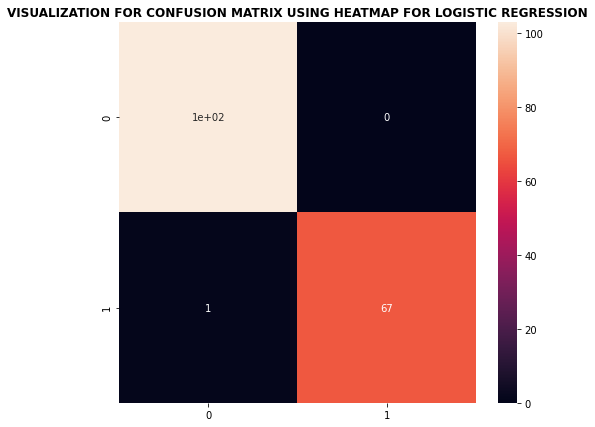

In [60]:
plt.figure(figsize=(8,7))
sns.heatmap(confusion_matrix(Y_test,lr.predict(X_test_std)),annot=True)
plt.title('VISUALIZATION FOR CONFUSION MATRIX USING HEATMAP FOR LOGISTIC REGRESSION',fontweight='bold')
plt.show()

**FROM THE ABOVE CONFUSION MATRIX VISUALIZATION, WE OBSERVE THAT ONLY ONE TEST CASE IS WRONGLY PREDICTED OTHERWISE THE LOGISTIC REGRESSION MODEL WITH STANDARDIZED DATA PREDICTS WITH UPMOST ACCURACY**

In [59]:
print('CLASSIFICATION REPORT FOR SVC ALGORITHM :\n{}'.format(classification_report(Y_test,svc.predict(X_test_std))))

CLASSIFICATION REPORT FOR SVC ALGORITHM :
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       103
           1       1.00      0.99      0.99        68

    accuracy                           0.99       171
   macro avg       1.00      0.99      0.99       171
weighted avg       0.99      0.99      0.99       171



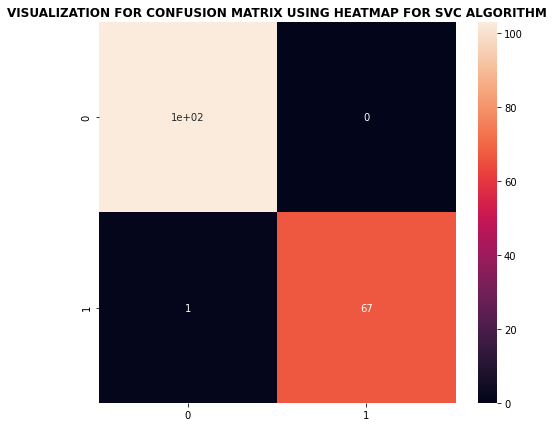

In [61]:
plt.figure(figsize=(8,7))
sns.heatmap(confusion_matrix(Y_test,svc.predict(X_test_std)),annot=True)
plt.title('VISUALIZATION FOR CONFUSION MATRIX USING HEATMAP FOR SVC ALGORITHM',fontweight='bold')
plt.show()

**FROM THE ABOVE CONFUSION MATRIX VISUALIZATION, WE OBSERVE THAT ONLY ONE TEST CASE IS WRONGLY PREDICTED OTHERWISE THE SVC MODEL WITH STANDARDIZED DATA PREDICTS WITH HIGH PRECISION**

**WE CONCLUDE WITH THE ABOVE MODELS THAT SVC AND LOGISTIC REGRESSION IS HIGHLY PRECISE MODELS FOR THE BREAST CANCER PREDICTION AND THE STANDARDISED DATA PLAYS A IMPORTANT ROLE IN PRECISE PREDICTION, WE HAVE ALSO TRIED TO MINIMIZE THE TYPE 2 AND TYPE 1 ERROR WHICH ARE BOTH QUITE DANGEROUS IN DIAGNOSTIC PROCESS.** 